#Stock Price Prediction And Forecasting Using Stacked LSTM- Deep Learning

In [32]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [22]:
df = pd.read_csv("/Users/vamshi/Documents/Stock-Market/Dataset .csv")

In [23]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


Target variable is close 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Date       104224 non-null  object 
 2   Open       104224 non-null  float64
 3   High       104224 non-null  float64
 4   Low        104224 non-null  float64
 5   Close      104224 non-null  float64
 6   Adj Close  104224 non-null  float64
 7   Volume     104224 non-null  float64
 8   CloseUSD   104224 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.2+ MB


In [25]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,1.042240e+05,104224.000000
mean,8015.353334,8063.324234,7962.581120,8014.366642,8014.161269,1.347646e+09,3046.729177
std,9140.563404,9196.575802,9082.767802,9140.609758,9140.720456,4.427662e+09,3747.865623
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00,10.204900
25%,2046.887756,2057.213990,2037.185943,2047.506470,2047.358490,0.000000e+00,320.460898
50%,5772.140137,5812.764892,5725.199951,5773.710205,5773.710205,9.529000e+05,1371.598486
75%,10487.377445,10552.179690,10416.092287,10488.622560,10488.622560,2.064676e+08,4383.045241
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10,18934.376173


In [26]:
df.shape

(104224, 9)

In [27]:
filtered_data = df[df['Date'] >= '2014-01-01']
filtered_data.reset_index(drop=True, inplace=True)
print(filtered_data)

         Index        Date         Open         High          Low  \
0          HSI  2014-01-02  23452.75977  23469.33008  23173.92969   
1          HSI  2014-01-03  23097.98047  23097.98047  22782.41992   
2          HSI  2014-01-06  22732.83008  22757.44922  22567.76953   
3          HSI  2014-01-07  22689.25000  22802.84961  22644.58008   
4          HSI  2014-01-08  22834.81055  23031.18945  22778.83008   
...        ...         ...          ...          ...          ...   
23919  J203.JO  2021-05-25  66054.92188  66812.45313  66022.97656   
23920  J203.JO  2021-05-26  66076.67969  66446.36719  66030.35156   
23921  J203.JO  2021-05-27  66108.22656  66940.25000  66102.54688   
23922  J203.JO  2021-05-28  66940.25000  67726.56250  66794.60938   
23923  J203.JO  2021-05-31  67554.85938  68140.85156  67554.85938   

             Close    Adj Close        Volume     CloseUSD  
0      23340.05078  23340.05078  1.042215e+09  3034.206601  
1      22817.27930  22817.27930  1.994801e+09  29

In [28]:
df2 = filtered_data

In [29]:
df2.shape


(23924, 9)

In [30]:
df= df2.reset_index()['CloseUSD']

In [33]:
df.head(5)

0    3034.206601
1    2966.246309
2    2948.939551
3    2952.661309
4    2989.556679
Name: CloseUSD, dtype: float64

In [34]:
df.tail(5)

23919    4625.367578
23920    4627.575859
23921    4685.817500
23922    4728.840157
23923    4757.482734
Name: CloseUSD, dtype: float64

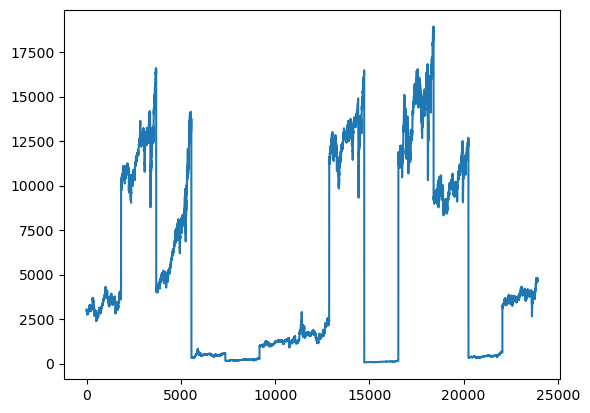

In [31]:
plt.plot(df)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df= scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
train_size = int(len(df)*0.65)
test_size = len(df)- train_size

train_data, test_data = df[0:train_size,:], df[train_size:len(df), :1]